In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import linalg
from scipy import io

In [4]:
from sklearn import linear_model as lmd

In [5]:
InFile1          = 'LinSepC1.mat'
InFile2          = 'LinSepC2.mat'
C1Dict           = io.loadmat(InFile1)
C2Dict           = io.loadmat(InFile2)
C1               = C1Dict['LinSepC1']
C2               = C2Dict['LinSepC2']
NSampsClass    = 200
NSamps         = 2*NSampsClass

In [6]:
### Set Target Outputs ###
TargetOutputs                     =  np.ones((NSamps,1))
TargetOutputs[NSampsClass:NSamps] = -TargetOutputs[NSampsClass:NSamps]

In [7]:
AllSamps     = np.concatenate((C1,C2),axis=0)

In [8]:
AllSamps.shape

(400, 2)

In [9]:
#import sklearn
#sklearn.__version__

In [10]:
LinMod = lmd.LinearRegression.fit?

In [ ]:
LinMod = lmd.LinearRegression.fit

In [11]:
LinMod = lmd.LinearRegression.fit

In [12]:
M = lmd.LinearRegression()

In [13]:
print(M)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [14]:
LinMod = lmd.LinearRegression.fit(M, AllSamps, TargetOutputs, sample_weight=None)

In [15]:
R = lmd.LinearRegression.score(LinMod, AllSamps, TargetOutputs, sample_weight=None)

In [16]:
print(R)

0.9112691769822486


In [17]:
LinMod

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
w = LinMod.coef_
w

array([[0.81592447, 0.94178188]])

In [19]:
w0 = LinMod.intercept_
w0

array([-0.01663028])

In [20]:
### Question:  How would we compute the outputs of the regression model?

Learn About Kernels

Do some SVM Classification

In [21]:
from sklearn.svm import SVC

In [22]:
### SVC wants a 1d array, not a column vector
Targets = np.ravel(TargetOutputs)

In [23]:
InitSVM = SVC()
InitSVM

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
TrainedSVM = InitSVM.fit(AllSamps, Targets)

In [25]:
y = TrainedSVM.predict(AllSamps)

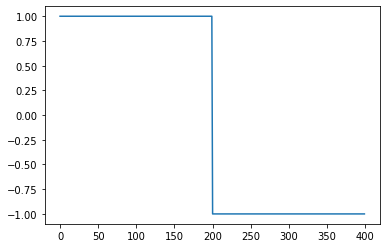

In [26]:
plt.figure(1)
plt.plot(y)
plt.show()

In [27]:
d = TrainedSVM.decision_function(AllSamps)

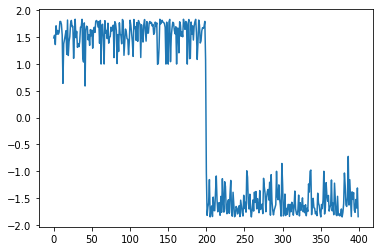

In [28]:
plt.figure(1)
plt.plot(d)
plt.show()

Can try it with Outliers if we have time

Let's look at some spectra

In [29]:
### Look at some Pine and Oak spectra from
### NEON Site D03 Ordway-Swisher Biological Station
### at UF
### Pinus palustris
### Quercus virginiana
InFile1 = 'Pines.mat'
InFile2 = 'Oaks.mat'
C1Dict  = io.loadmat(InFile1)
C2Dict  = io.loadmat(InFile2)
Pines   = C1Dict['Pines']
Oaks    = C2Dict['Oaks']

In [30]:
WvFile  = 'NEONWvsNBB.mat'
WvDict  = io.loadmat(WvFile)
Wv      = WvDict['NEONWvsNBB']

In [31]:
Pines.shape

(809, 346)

In [32]:
Oaks.shape

(1731, 346)

In [33]:
NBands=Wv.shape[0]
print(NBands)

346


Notice that these training sets are unbalanced

In [34]:
NTrainSampsClass = 600
NTestSampsClass  = 200
Targets          = np.ones((1200,1))
Targets[range(600)] = -Targets[range(600)]
Targets             = np.ravel(Targets)
print(Targets.shape)

(1200,)


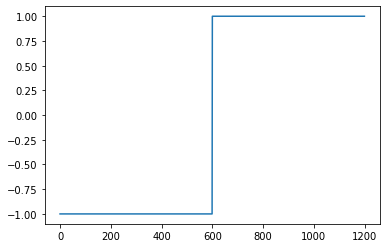

In [35]:
plt.figure(111)
plt.plot(Targets)
plt.show()

In [36]:
TrainPines = Pines[0:600,:]
TrainOaks  = Oaks[0:600,:]
#TrainSet   = np.concatenate?

In [37]:
TrainSet   = np.concatenate((TrainPines, TrainOaks), axis=0)
print(TrainSet.shape)

(1200, 346)


In [ ]:
plt.figure(3)
### Plot Pine Training Spectra ###
plt.subplot(121)
plt.plot(Wv, TrainPines.T)
plt.ylim((0.0,0.8))
plt.xlim((Wv[1], Wv[NBands-1]))
### Plot Oak Training Spectra ###
plt.subplot(122)
plt.plot(Wv, TrainOaks.T)
plt.ylim((0.0,0.8))
plt.xlim((Wv[1], Wv[NBands-1]))
plt.show()

In [ ]:
InitSVM= SVC()

In [41]:
TrainedSVM=InitSVM.fit(TrainSet, Targets)

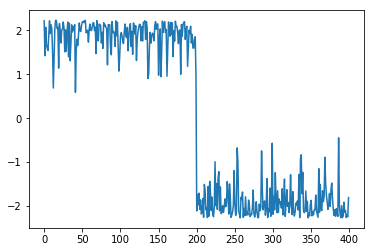

In [42]:
plt.figure(4)
plt.plot(d)
plt.show()

Does this seem to be too good to be true?

In [43]:
TestPines = Pines[600:800,:]
TestOaks  = Oaks[600:800,:]

In [44]:
TestSet = np.concatenate((TestPines, TestOaks), axis=0)
print(TestSet.shape)

(400, 346)


In [45]:
dtest = TrainedSVM.decision_function(TestSet)

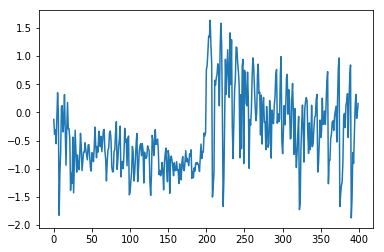

In [46]:
plt.figure(5)
plt.plot(dtest)
plt.show()

Yeah, too good to be true...What can we do?

Error Analysis: Identify characteristics of Errors, Try different Magic Numbers using Cross Validation, etc.